In [ ]:
from quant_rotor.core.dense.hamiltonian import hamiltonian
from quant_rotor.core.dense.hamiltonian_big import hamiltonian_general, hamiltonian_big
from quant_rotor.models.dense.support_ham import H_kinetic_sparse, H_potential_sparse
from quant_rotor.core.dense.de_solve_one_thermal import integration_scheme
from quant_rotor.core.dense.t_amplitudes_periodic import t_periodic
import numpy as np
from quant_rotor.models.dense.support_ham import write_matrix_elements, basis_m_to_p_matrix_conversion, H_kinetic, H_potential
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from quant_rotor.models.dense.stat_mech_thermo import generate_graphs, A, Z, S, heat_capacity, U, beta_func

# One body hamiltonian.

In [2]:
sites = 1
states = 5

K, V = write_matrix_elements((states-1)//2)

In [3]:
K_tilda = bz.H_tilde_maker(K)

NameError: name 'bz' is not defined

In [4]:
time,t_0, one_max_TDCC, dTa_idt_sol = integration_scheme(sites, states, 1, t_init=0,t_final=100,nof_points=10000, import_K_V=True, K_import=K_tilda, V_import=V)

ValueError: cannot reshape array of size 81 into shape (1,1,1,1)

/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


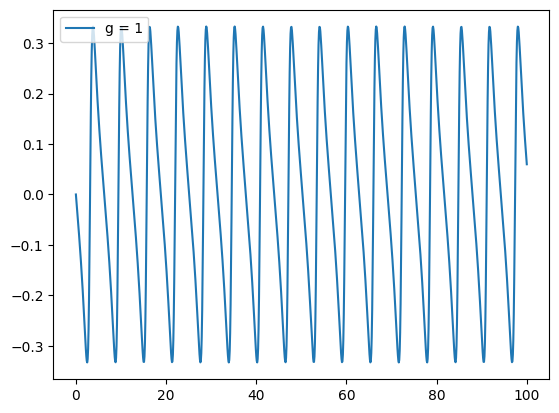

In [ ]:
plt.plot(time, t_0, label=f"g = {g}")
plt.legend()
plt.show()

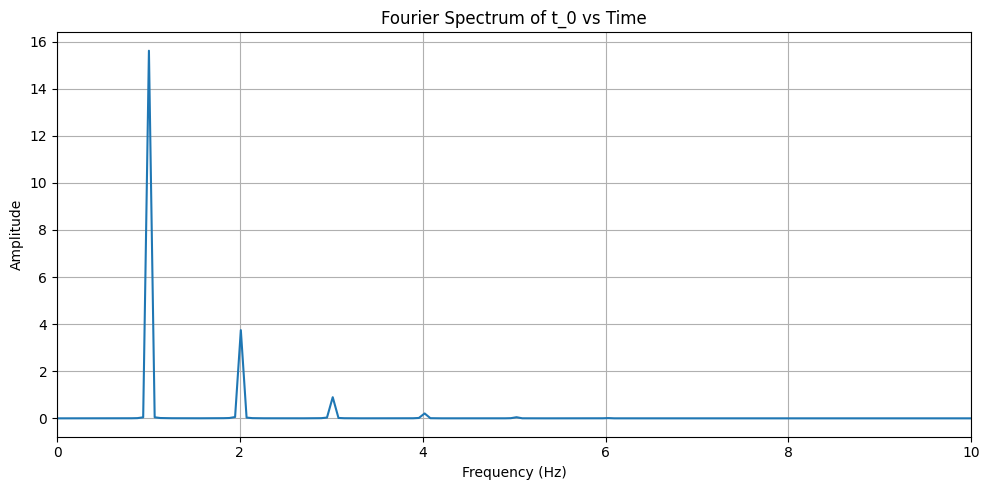

Dominant Frequencies: [1.005309649149 2.010619298297 3.015928947446 4.021238596595 5.026548245744 6.031857894892 7.037167544041]


In [ ]:
# Ensure t_0 is real or extract real part
t_0_real = np.real(t_0)
y = 1*np.exp(1j*4.5*time) + 0.5*np.exp(1j*2*time) 

# Time step (assumes uniform sampling)
N = len(time)
dt = time[-1]/N

# FFT
fft_vals = np.fft.fftshift(np.fft.fft(t_0_real))
freqs = np.fft.fftshift(np.fft.fftfreq(N, dt))* 2*np.pi

# Take positive half
positive_freqs = freqs[N//2:]
fft_magnitude = np.abs(fft_vals[N//2:])**2/N

# Plot FFT spectrum
plt.figure(figsize=(10, 5))
plt.plot(positive_freqs, fft_magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Fourier Spectrum of t_0 vs Time")
plt.xlim(0,10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Identify top peaks

peaks, _ = find_peaks(fft_magnitude, height=0.001)  # threshold as 10% of max
dominant_freqs = positive_freqs[peaks]
print("Dominant Frequencies:", dominant_freqs)

In [ ]:
eig_val, eig_vec = np.linalg.eigh(K_tilda)

In [ ]:
eig_val

array([-0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.])

# Oz funtion test.

In [ ]:
states = 5
sites = 5
g = 1

H_K_V = hamiltonian(states, sites, g)
K_final = H_kinetic_sparse(states, sites, H_K_V[1])
V_final = H_potential_sparse(states, sites, H_K_V[2], g)
K = K_final.toarray()
V = V_final.toarray()


H_tilda = bz.H_tilde_maker(H_K_V[0])
K_tilda = bz.H_tilde_maker(K)
V_tilda = bz.H_tilde_maker(V)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/thermofield_boltz_funcs.py:122: ComplexWarning: Casting complex values to real discards the imaginary part
  H_Tilde_2[i,k + physical_hilbert_dim*j] = diagonal_basis[j,i]*hamiltonian[j,k]
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/thermofield_boltz_funcs.py:143: ComplexWarning: Casting complex values to real discards the imaginary part
  H_tilde[:physical_hilbert_dim,:physical_hilbert_dim] = H_Tilde_1
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/thermofield_boltz_funcs.py:146: ComplexWarning: Casting complex values to real discards the imaginary part
  H_tilde[physical_hilbert_dim:,physical_hilbert_dim:] = H_tilde_4


In [ ]:
np.array_equal(H_tilda, K_tilda + V_tilda)

True

In [ ]:
np.set_printoptions(threshold=np.inf)
physical_hilbert_dim = np.shape(H_K_V[0])[0]

In [ ]:
eig_val_tilda, eig_vec_tilda = np.linalg.eigh(H_tilda)
eig_val, eig_vec = np.linalg.eigh(H_K_V[0])

In [ ]:
eig_val

array([-0.02002102681 ,  0.78532515952 ,  0.945133503798,  0.945133503798,  1.090833695337,  1.098685120478,  1.098685120478,  1.816280326647,  1.867712434447,  1.867712434447,  1.95          ,  1.95          ,  1.95          ,  2.05          ,  2.1           ,  2.1           ,  2.103740700163,  2.132287565553,  2.132287565553,  3.            ,  3.            ,  3.001314879522,  3.001314879522,  3.004866496202,  3.004866496202,  3.009166304663,  3.01467484048 ])

In [ ]:
eig_val_tilda[::26]

array([-0.02002102681 , -0.02002102681 ,  0.78532515952 ,  0.945133503798,  0.945133503798,  1.090833695337,  1.098685120478,  1.098685120478,  1.816280326647,  1.867712434447,  1.867712434447,  1.95          ,  1.95          ,  1.95          ,  2.05          ,  2.1           ,  2.1           ,  2.103740700163,  2.132287565553,  2.132287565553,  3.            ,  3.            ,  3.001314879522,  3.001314879522,  3.004866496202,  3.004866496202,  3.009166304663,  3.01467484048 ,  3.01467484048 ])

In [ ]:
tf = 10

In [ ]:
time,t_0, one_max_TDCC, two_max_TDCC, dTa_idt_sol, dTab_ijdt_sol = integration_scheme(sites, states, g, t_init=0,t_final=tf,nof_points=10000, import_K_V=True, K_import=K, V_import=V)

ValueError: cannot reshape array of size 729 into shape (9,9,9,9,9)

# H tilda modified.

In [84]:
site = 3
state = 5
g = 0.2

In [ ]:
H_K_V_5_5 = hamiltonian_general(state, site, g)

K_tilda = K_tilde_maker(H_K_V_5_5[1])
V_tilda = K_tilde_maker( H_K_V_5_5[2])
# V_tilda = V_tilde_maker(V_5_5)

In [ ]:
K, V = write_matrix_elements((state-1)//2)

V = V + V.T - np.diag(np.diag(V))
V_tensor = V.reshape(state, state, state, state) 

K_tilda = K_tilde_maker(K_5_5)
V_tilda = K_tilde_maker(V_5_5)
# V_tilda = V_tilde_maker(V_5_5)

NameError: name 'states' is not defined

In [4]:
V_tilda.shape

(14641, 14641)

In [ ]:
# H_K_V_33 = hamiltonian(5, 3, 0.2)
# H_K_V_5_5 =  hamiltonian_big(5, 3, 0.2, H_K_V_33)

# K_5_5 = H_K_V_5_5[1]
# V_5_5 = H_K_V_5_5[2]

# K_tilda = H_tilde_maker(K_5_5)
# V_tilda = H_tilde_maker(V_5_5)

In [22]:
H_K_V_33 = hamiltonian(state, site, g)

K_3_3 = H_K_V_33[1]
V_3_3 = H_K_V_33[2]*g

K_tilda = H_tilde_maker(K_3_3)
V_tilda = H_tilde_maker(V_3_3)

In [4]:
beta, t_0_dB, t_0_sol, t_2_max  = integration_scheme(site, state, g, t_init=0,t_final=10,nof_points=100000, import_K_V_NO=True, K_import=K_5_5, V_import=V_5_5)

In [14]:
beta, t_0_dB, t_0_sol, t_2_max  = integration_scheme(site, state, g, t_init=0,t_final=10,nof_points=100000)

In [9]:
beta, t_0_dB, t_0_sol, t_2_max  = integration_scheme(site, state, g, t_init=0,t_final=10,nof_points=100000, import_K_V_TF=True, K_import=K_tilda, V_import=V_tilda)

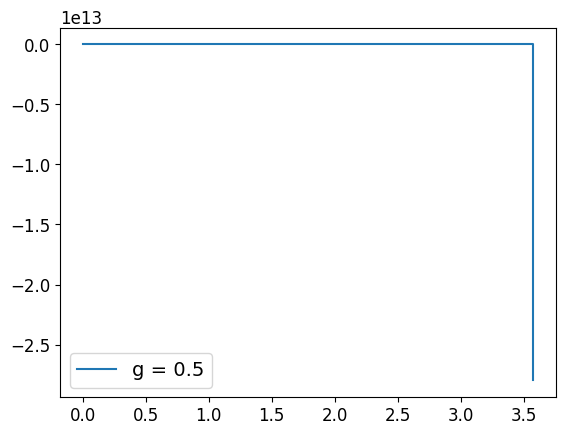

In [33]:
plt.plot(beta, t_2_max, label=f"g = {g}")
plt.legend()
plt.show()

In [10]:
np.max(t_0_dB)

np.complex128(0.02820574675739395-0j)

In [31]:
0.08963929647814695/3

0.02987976549271565

In [17]:
np.max(si5_st5_dB[2])

np.complex128(0.011511259717736377-0j)

In [18]:
plt.plot(beta, t_0_dB, label=f"g = {g}")
plt.legend()
plt.show()

NameError: name 't_0_dB' is not defined

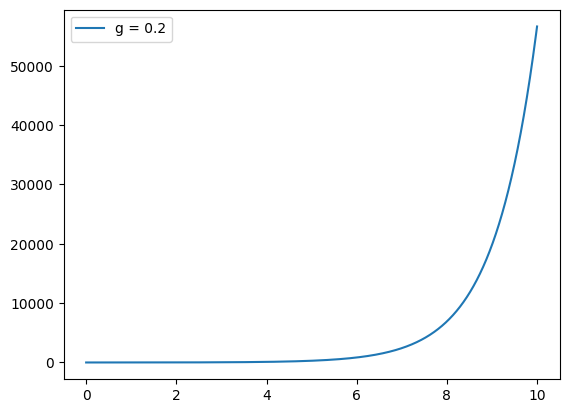

In [9]:
plt.plot(beta, t_0_sol, label=f"g = {g}")
plt.legend()
plt.show()

In [86]:
site = 3
state = 5

In [88]:
si5_st5_sol = []
si5_st5_dB = []
si5_st5_ED_Z = []
si5_st5_ED_U = []
beta_array = []
g_array = np.array([0, 0.1, 0.2, 0.3, 0.5])

for g_index, g in enumerate(g_array):

    H = hamiltonian_general(state, site, g)[0]

    eig_val_ED, _ = np.linalg.eigh(H)

    H_K_V_5_5 = hamiltonian_general(state, site, g)

    K_tilda = K_tilde_maker(H_K_V_5_5[1])
    V_tilda = V_tilde_maker( H_K_V_5_5[2])
    
    beta, si5_st5_dB_var, si5_st5_sol_var, _  = integration_scheme(site, state, g, t_init=0,t_final=10,nof_points=100000, import_K_V_TF=True, K_import=K_tilda, V_import=V_tilda)

    si5_st5_ED_Z_val = np.array([np.log(Z(eig_val_ED, x)) for x in beta])
    si5_st5_ED_U_val = np.array([U(eig_val_ED, x) for x in beta])

    si5_st5_dB.append(si5_st5_dB_var)
    si5_st5_sol.append(si5_st5_sol_var)
    si5_st5_ED_Z.append(si5_st5_ED_Z_val)
    si5_st5_ED_U.append(si5_st5_ED_U_val)
    beta_array.append(beta)

/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/quant_rotor/models/thermofield_boltz_funcs.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
  H_Tilde_2[i,k + physical_hilbert_dim*j] = diagonal_basis[j,i]*hamiltonian[j,k]
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/quant_rotor/models/thermofield_boltz_funcs.py:87: ComplexWarning: Casting complex values to real discards the imaginary part
  H_tilde[:physical_hilbert_dim,:physical_hilbert_dim] = H_Tilde_1
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/quant_rotor/models/thermofield_boltz_funcs.py:90: ComplexWarning: Casting complex values to real discards the imaginary part
  H_tilde[physical_hilbert_dim:,physical_hilbert_dim:] = H_tilde_4


/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


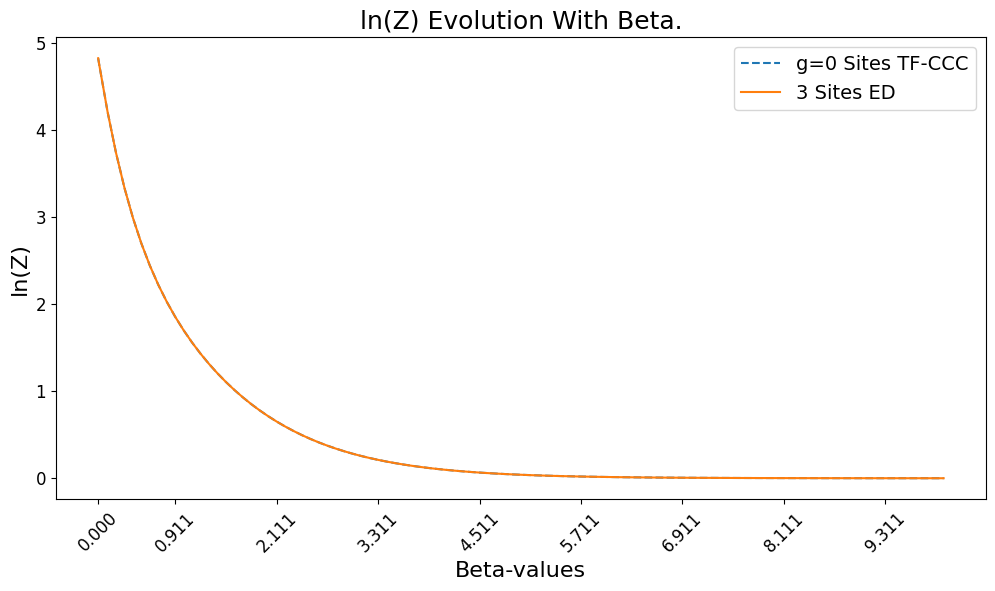

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(beta_array[0], si5_st5_sol[0] + np.log(state**site), label=f"g={0} Sites TF-CCC", linestyle='--')
plt.plot(beta_array[0], si5_st5_ED_Z[0], label=f"{site} Sites ED")
plt.xticks(beta_array[0][::12], rotation=45) 
plt.xlabel("Beta-values")
plt.ylabel("ln(Z)")
plt.title("ln(Z) Evolution With Beta.", fontsize=18)
plt.legend()
plt.show()

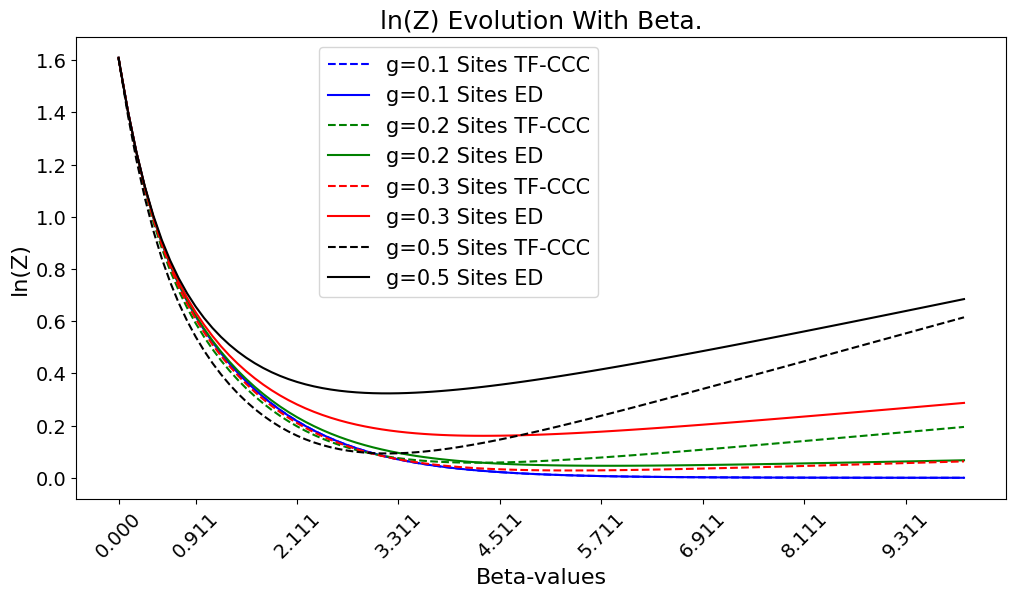

In [90]:
plt.figure(figsize=(12, 6))
plt.rcParams.update({
    'font.size': 14,              # Larger font for all text
    'legend.fontsize': 15,        # Larger legend text
    'axes.labelsize': 16,         # Axis labels
    'xtick.labelsize': 14,        # Tick labels
    'ytick.labelsize': 14
})

colours = ["blue", "green", "red", "black"]

for g_index, g in enumerate(g_array[1:]):
    plt.plot(beta_array[g_index], (si5_st5_sol[g_index] + np.log(state**site))/site,
              label=f"g={g} Sites TF-CCC", linestyle='--', color = colours[g_index])
    plt.plot(beta_array[g_index], si5_st5_ED_Z[g_index]/site, label=f"g={g} Sites ED",  color = colours[g_index])
plt.xticks(beta_array[g_index][::12], rotation=45) 
plt.xlabel("Beta-values")
plt.ylabel("ln(Z)")
plt.title("ln(Z) Evolution With Beta.", fontsize=18)
plt.legend(loc='upper left', bbox_to_anchor=(0.25, 1))
plt.show()

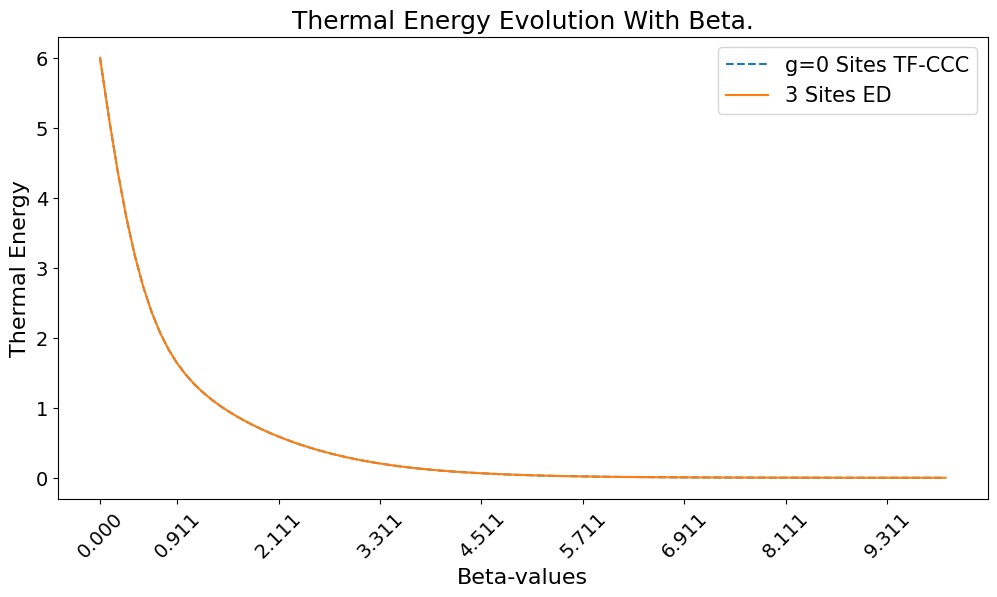

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(beta_array[0], -si5_st5_dB[0], label=f"g={0} Sites TF-CCC", linestyle='--')
plt.plot(beta_array[0], si5_st5_ED_U[0], label=f"{site} Sites ED")
plt.xticks(beta_array[0][::12], rotation=45) 
plt.xlabel("Beta-values")
plt.ylabel("Thermal Energy")
plt.title("Thermal Energy Evolution With Beta.", fontsize=18)
plt.legend()
plt.show()

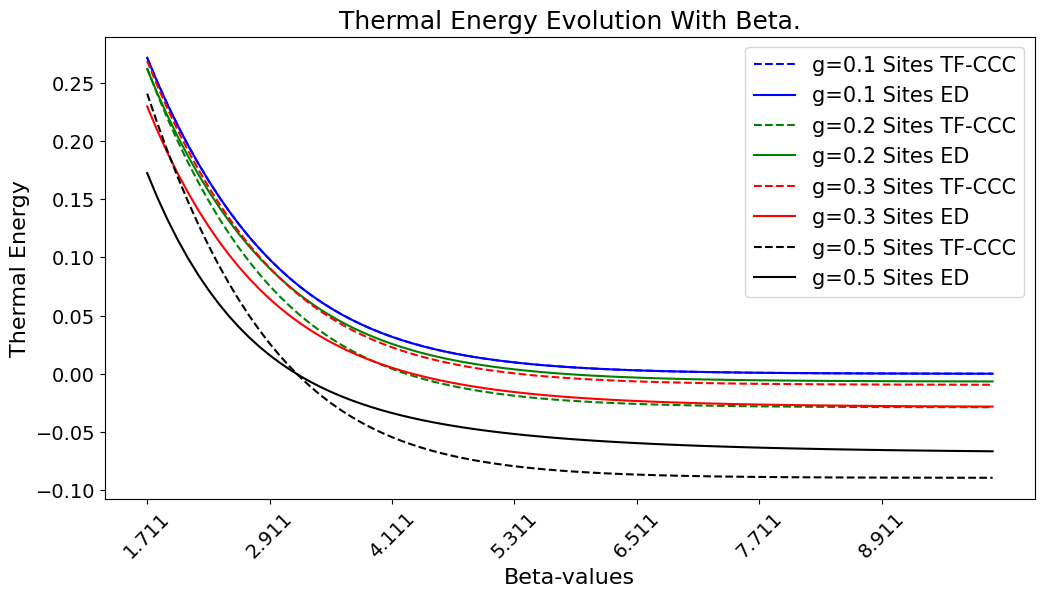

In [92]:
d = 20

plt.figure(figsize=(12, 6))
plt.rcParams.update({
    'font.size': 14,              # Larger font for all text
    'legend.fontsize': 15,        # Larger legend text
    'axes.labelsize': 16,         # Axis labels
    'xtick.labelsize': 14,        # Tick labels
    'ytick.labelsize': 14
})

for g_index, g in enumerate(g_array[1:]):
    plt.plot(beta_array[g_index][d:], -si5_st5_dB[g_index][d:]/site, label=f"g={g} Sites TF-CCC", linestyle='--', color=colours[g_index])
    plt.plot(beta_array[g_index][d:], si5_st5_ED_U[g_index][d:]/site, label=f"g={g} Sites ED",  color=colours[g_index])
plt.xticks(beta_array[g_index][d:][::12], rotation=45) 
plt.xlabel("Beta-values")
plt.ylabel("Thermal Energy")
plt.title("Thermal Energy Evolution With Beta.", fontsize=18)
plt.legend(loc='upper right')
plt.show()

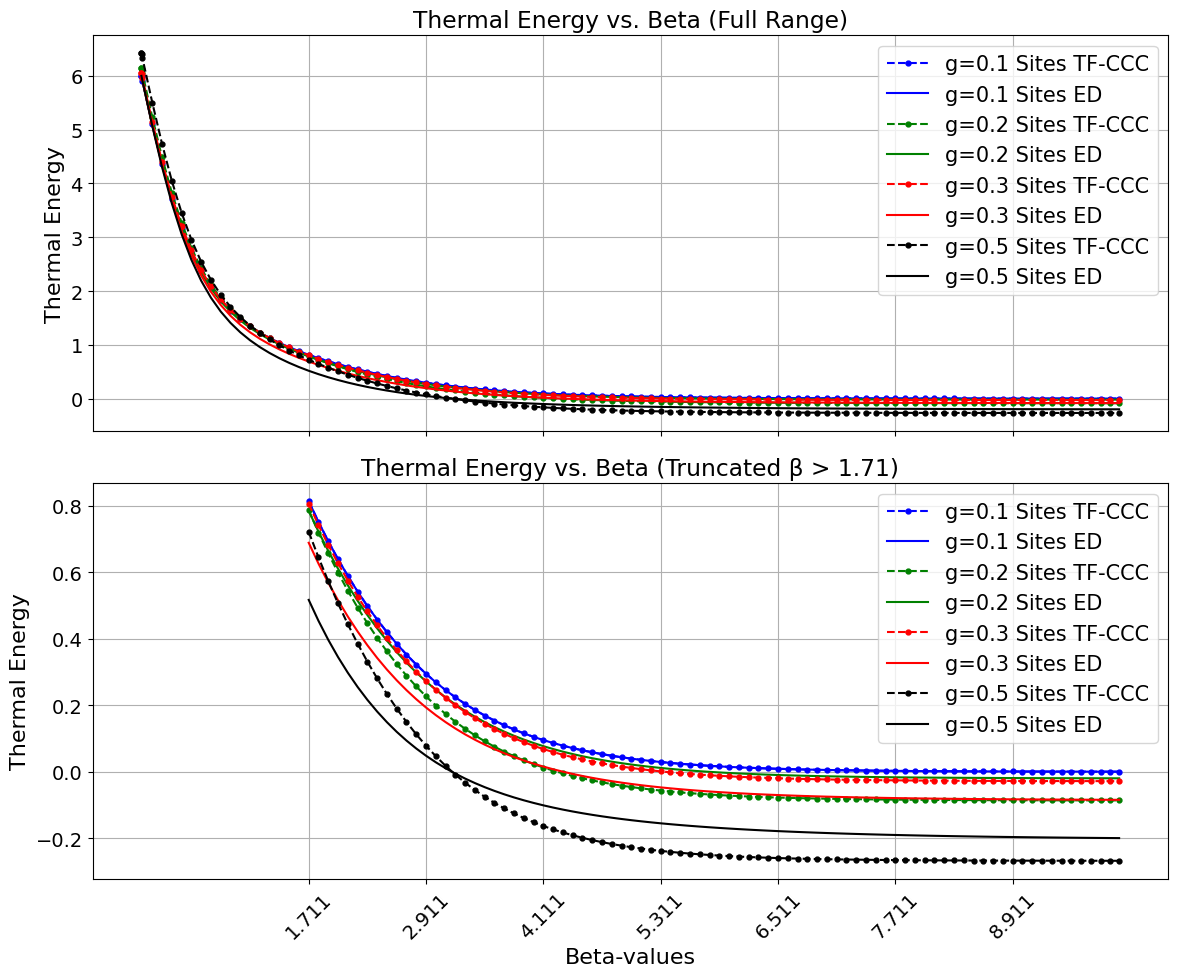

In [93]:
d = 20

# Update global font settings
plt.rcParams.update({
    'font.size': 14,
    'legend.fontsize': 15,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
})

# Create two vertically stacked subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# ---- Subplot 1: Full beta range ----
for g_index, g in enumerate(g_array[1:]):
    axs[0].plot(
        beta_array[g_index],
        -si5_st5_dB[g_index],
        label=f"g={g} Sites TF-CCC", linestyle='--', marker='o', markersize=3.5, color=colours[g_index]
    )
    axs[0].plot(
        beta_array[g_index],
        si5_st5_ED_U[g_index],
        label=f"g={g} Sites ED", color=colours[g_index]
    )

axs[0].set_ylabel("Thermal Energy")
axs[0].set_title("Thermal Energy vs. Beta (Full Range)")
axs[0].legend(loc='upper right')
axs[0].grid(True)

# ---- Subplot 2: Truncated beta > d ----
for g_index, g in enumerate(g_array[1:]):
    axs[1].plot(
        beta_array[g_index][d:],
        -si5_st5_dB[g_index][d:],
        label=f"g={g} Sites TF-CCC", linestyle='--', marker='o', markersize=3.5, color=colours[g_index]
    )
    axs[1].plot(
        beta_array[g_index][d:],
        si5_st5_ED_U[g_index][d:],
        label=f"g={g} Sites ED", color=colours[g_index]
    )

axs[1].set_xlabel("Beta-values")
axs[1].set_ylabel("Thermal Energy")
axs[1].set_title(f"Thermal Energy vs. Beta (Truncated β > {beta_array[g_index][d]:.2f})")
axs[1].legend(loc='upper right')
axs[1].set_xticks(beta_array[g_index][d:][::12])
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [94]:
si5_st5_ED_A = []
si5_st5_ED_S = []

for g_index, g in enumerate(g_array):

    H = hamiltonian_general(state, site, g)[0]

    eig_val_ED, _ = np.linalg.eigh(H)

    si5_st5_ED_A_val = np.array([A(eig_val_ED, x) for x in beta_array[g_index]])
    si5_st5_ED_S_val = np.array([S(eig_val_ED, x) for x in beta_array[g_index]])

    si5_st5_ED_A.append(si5_st5_ED_A_val)
    si5_st5_ED_S.append(si5_st5_ED_S_val)

/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/quant_rotor/models/stat_mech_thermo.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  return (-1/beta_val) * np.log(Z(eig_val, beta_val))


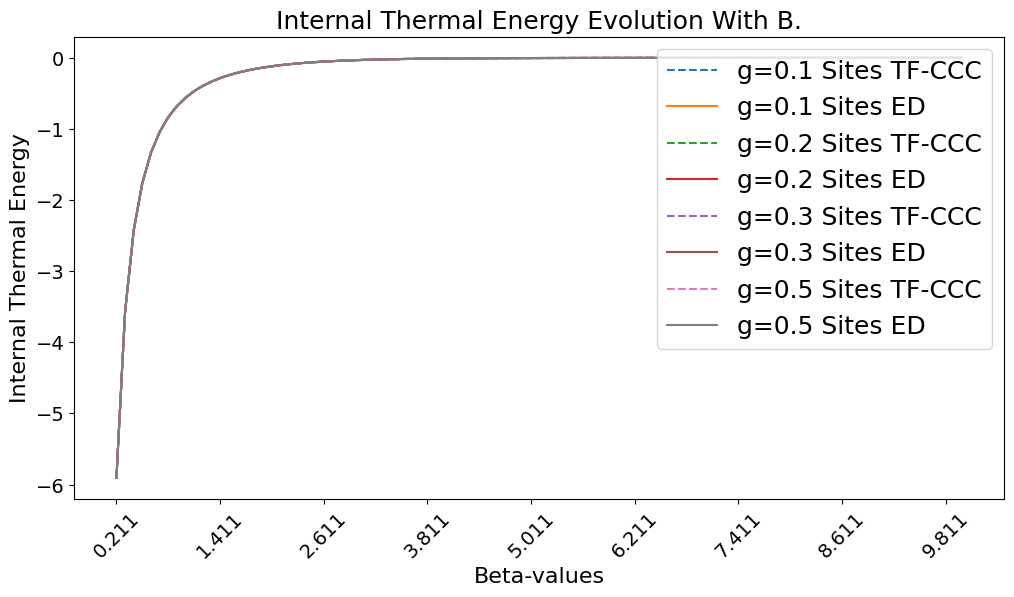

In [95]:
d = 5

plt.figure(figsize=(12, 6))
plt.rcParams.update({
    'font.size': 14,              # Larger font for all text
    'legend.fontsize': 18,        # Larger legend text
    'axes.labelsize': 16,         # Axis labels
    'xtick.labelsize': 14,        # Tick labels
    'ytick.labelsize': 14
})

for g_index, g in enumerate(g_array[1:]):
    g_index = 0
    plt.plot(beta_array[g_index][d:], (-(beta_array[g_index][d:]**(-1)) * (si5_st5_sol[g_index][d:] + np.log(state**site)))/site,
              label=f"g={g} Sites TF-CCC", linestyle='--')
    plt.plot(beta_array[g_index][d:], si5_st5_ED_A[g_index][d:]/site, label=f"g={g} Sites ED")
plt.xticks(beta_array[g_index][d:][::12], rotation=45) 
plt.xlabel("Beta-values")
plt.ylabel("Internal Thermal Energy")
plt.title("Internal Thermal Energy Evolution With B.", fontsize=18)
plt.legend(loc='upper right')
plt.show()

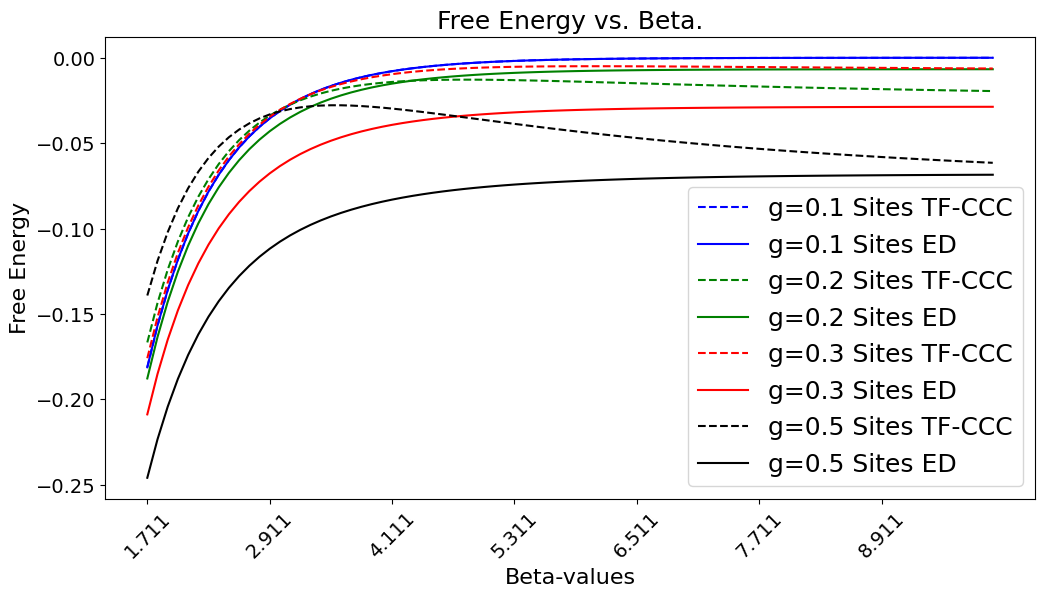

In [96]:
d = 20

plt.figure(figsize=(12, 6))
plt.rcParams.update({
    'font.size': 14,              # Larger font for all text
    'legend.fontsize': 18,        # Larger legend text
    'axes.labelsize': 16,         # Axis labels
    'xtick.labelsize': 14,        # Tick labels
    'ytick.labelsize': 14
})

for g_index, g in enumerate(g_array[1:]):
    plt.plot(beta_array[g_index][d:], (-(beta_array[g_index][d:]**(-1)) * (si5_st5_sol[g_index][d:] + np.log(state**site)))/site,
              label=f"g={g} Sites TF-CCC", linestyle='--', color=colours[g_index])
    plt.plot(beta_array[g_index][d:], si5_st5_ED_A[g_index][d:]/site, label=f"g={g} Sites ED", color=colours[g_index])
plt.xticks(beta_array[g_index][d:][::12], rotation=45) 
plt.xlabel("Beta-values")
plt.ylabel("Free Energy")
plt.title("Free Energy vs. Beta.", fontsize=18)
plt.legend(loc='lower right')
plt.show()

/var/folders/vt/f4sbj2d11gbbb9q5816khz2m0000gn/T/ipykernel_98753/1960787262.py:21: RuntimeWarning: divide by zero encountered in reciprocal
  -(beta_array[g_index]**(-1)) * (si5_st5_sol[g_index] + np.log(state**site)),
/var/folders/vt/f4sbj2d11gbbb9q5816khz2m0000gn/T/ipykernel_98753/1960787262.py:21: RuntimeWarning: invalid value encountered in multiply
  -(beta_array[g_index]**(-1)) * (si5_st5_sol[g_index] + np.log(state**site)),


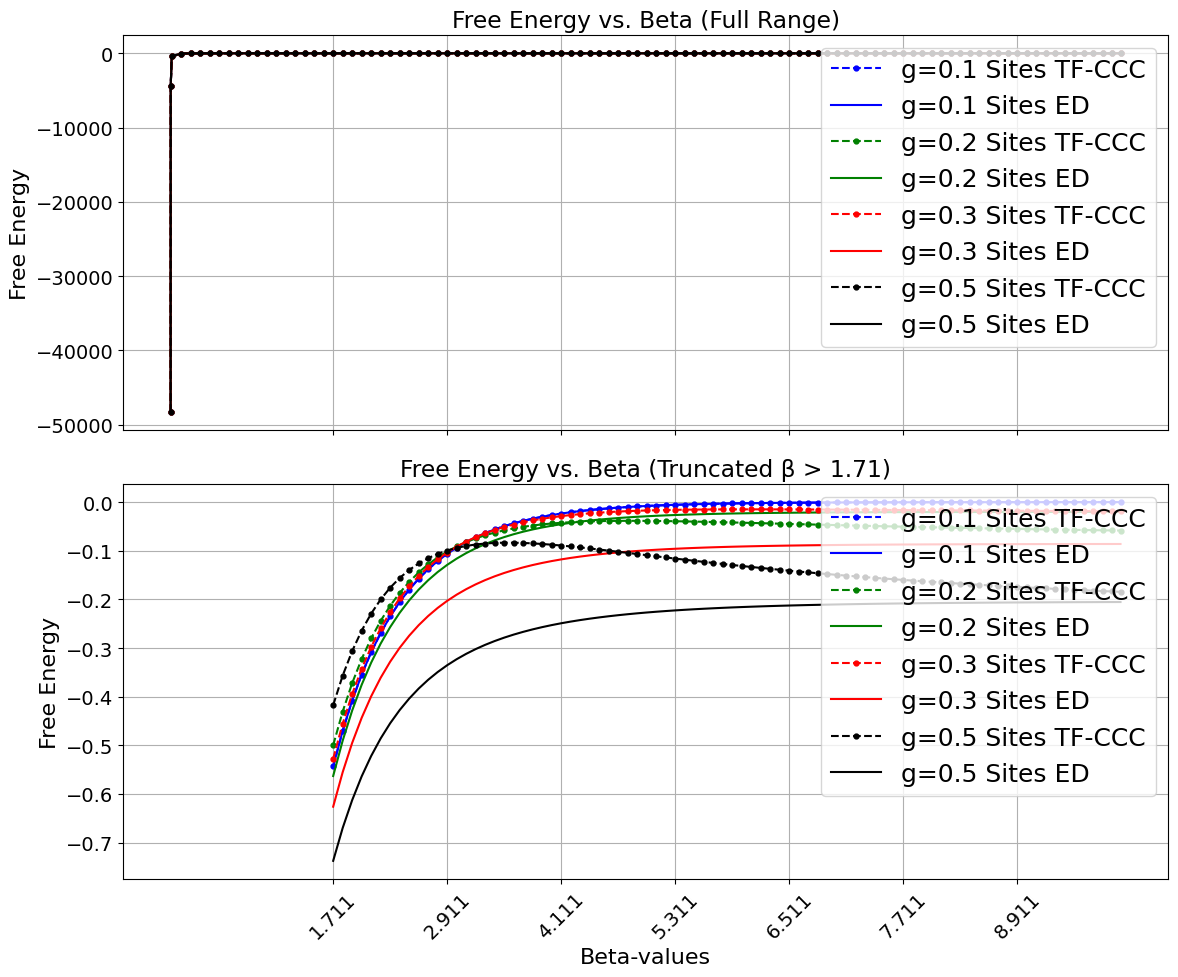

In [97]:
import matplotlib.pyplot as plt

d = 20

# Set global font settings like before
plt.rcParams.update({
    'font.size': 14,
    'legend.fontsize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
})

# Create two vertically stacked subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# ---- Subplot 1: Full beta range ----
for g_index, g in enumerate(g_array[1:]):
    axs[0].plot(
        beta_array[g_index], 
        -(beta_array[g_index]**(-1)) * (si5_st5_sol[g_index] + np.log(state**site)),
        label=f"g={g} Sites TF-CCC", linestyle='--', marker='o', markersize=3.5, color=colours[g_index]
    )
    axs[0].plot(
        beta_array[g_index], 
        si5_st5_ED_A[g_index], 
        label=f"g={g} Sites ED", color=colours[g_index]
    )

axs[0].set_ylabel("Free Energy")
axs[0].set_title("Free Energy vs. Beta (Full Range)")
axs[0].legend(loc='upper right')
axs[0].grid(True)

# ---- Subplot 2: Truncated beta > d ----
for g_index, g in enumerate(g_array[1:]):
    axs[1].plot(
        beta_array[g_index][d:], 
        -(beta_array[g_index][d:]**(-1)) * (si5_st5_sol[g_index][d:] + np.log(state**site)),
        label=f"g={g} Sites TF-CCC", linestyle='--', marker='o', markersize=3.5, color=colours[g_index]
    )
    axs[1].plot(
        beta_array[g_index][d:], 
        si5_st5_ED_A[g_index][d:], 
        label=f"g={g} Sites ED", color=colours[g_index]
    )

axs[1].set_xlabel("Beta-values")
axs[1].set_ylabel("Free Energy")
axs[1].set_title(f"Free Energy vs. Beta (Truncated β > {beta_array[g_index][d]:.2f})")
axs[1].legend(loc='upper right')
axs[1].set_xticks(beta_array[g_index][d:][::12])
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(True)

plt.tight_layout()
plt.show()

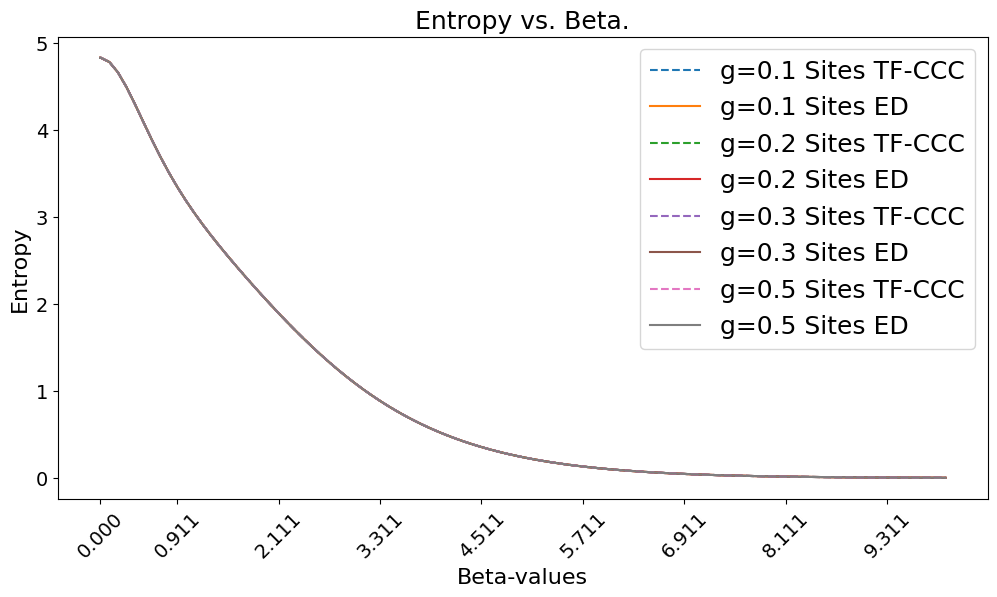

In [98]:
d = 20

plt.figure(figsize=(12, 6))
plt.rcParams.update({
    'font.size': 14,              # Larger font for all text
    'legend.fontsize': 18,        # Larger legend text
    'axes.labelsize': 16,         # Axis labels
    'xtick.labelsize': 14,        # Tick labels
    'ytick.labelsize': 14
})

for g_index, g in enumerate(g_array[1:]):
    g_index = 0
    plt.plot(beta_array[g_index], beta_array[g_index] * -si5_st5_dB[g_index] + (si5_st5_sol[g_index] + np.log(state**site)),
              label=f"g={g} Sites TF-CCC", linestyle='--')
    plt.plot(beta_array[g_index], si5_st5_ED_S[g_index], label=f"g={g} Sites ED")
plt.xticks(beta_array[g_index][::12], rotation=45) 
plt.xlabel("Beta-values")
plt.ylabel("Entropy")
plt.title("Entropy vs. Beta.", fontsize=18)
plt.legend(loc='upper right')
plt.show()

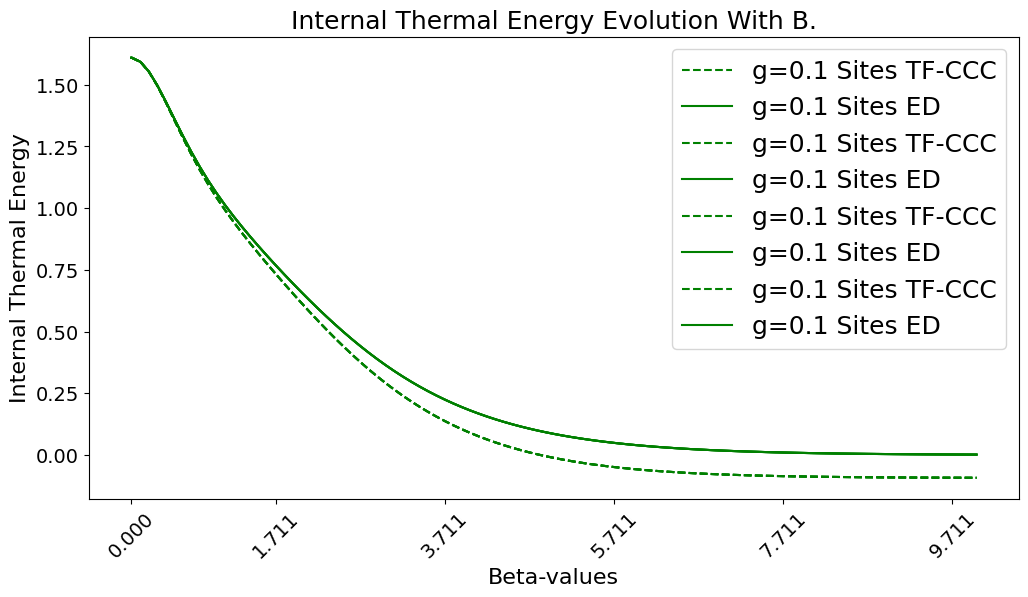

In [101]:
d = 0

plt.figure(figsize=(12, 6))
plt.rcParams.update({
    'font.size': 14,              # Larger font for all text
    'legend.fontsize': 18,        # Larger legend text
    'axes.labelsize': 16,         # Axis labels
    'xtick.labelsize': 14,        # Tick labels
    'ytick.labelsize': 14
})

for g_index, g in enumerate(g_array[1:]):

    g = 0.1
    g_index = 1

    plt.plot(beta_array[g_index][d:], (beta_array[g_index][d:] * -si5_st5_dB[g_index][d:] + (si5_st5_sol[g_index][d:] + np.log(state**site)))/site,
              label=f"g={g} Sites TF-CCC", linestyle='--', color=colours[g_index])
    plt.plot(beta_array[g_index][d:], si5_st5_ED_S[g_index][d:]/site, label=f"g={g} Sites ED", color=colours[g_index])
plt.xticks(beta_array[g_index][d:][::20], rotation=45) 
plt.xlabel("Beta-values")
plt.ylabel("Internal Thermal Energy")
plt.title("Internal Thermal Energy Evolution With B.", fontsize=18)
plt.legend(loc='upper right')
plt.show()

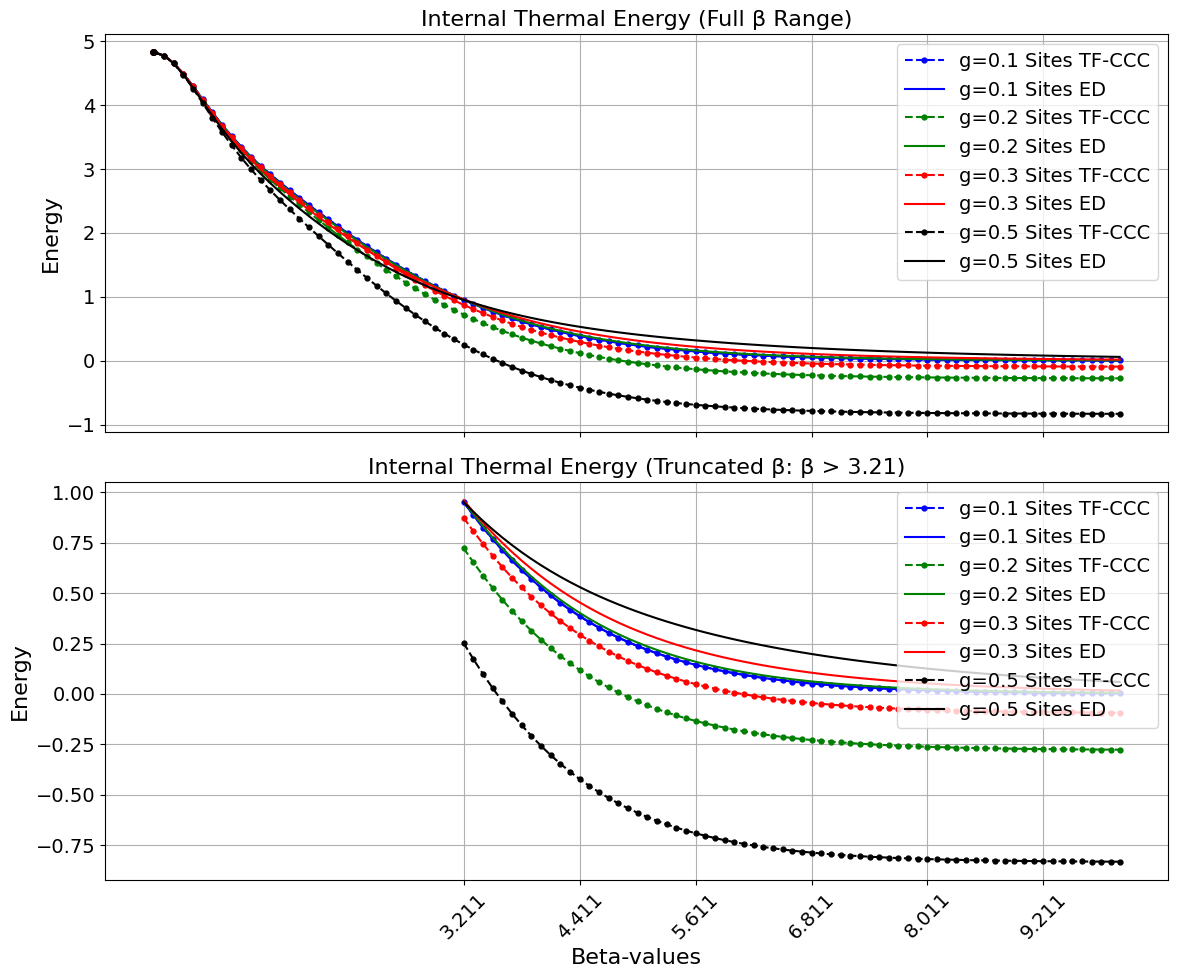

In [100]:
d = 35

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)
plt.rcParams.update({
    'font.size': 14,
    'legend.fontsize': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# --- Subplot 1: Full Data (No d applied) ---
for g_index, g in enumerate(g_array[1:]):
    axs[0].plot(
        beta_array[g_index],
        beta_array[g_index] * -si5_st5_dB[g_index] + (si5_st5_sol[g_index] + np.log(state**site)),
        label=f"g={g} Sites TF-CCC", linestyle='--', marker='o', markersize=3.5, color=colours[g_index]
    )
    axs[0].plot(
        beta_array[g_index],
        si5_st5_ED_S[g_index],
        label=f"g={g} Sites ED", color=colours[g_index]
    )

axs[0].set_title("Internal Thermal Energy (Full β Range)", fontsize=16)
axs[0].set_ylabel("Energy")
axs[0].legend(loc='upper right')
axs[0].grid(True)

# --- Subplot 2: Truncated Data (β > d) ---
for g_index, g in enumerate(g_array[1:]):
    axs[1].plot(
        beta_array[g_index][d:],
        beta_array[g_index][d:] * -si5_st5_dB[g_index][d:] + (si5_st5_sol[g_index][d:] + np.log(state**site)),
        label=f"g={g} Sites TF-CCC", linestyle='--', marker='o', markersize=3.5, color=colours[g_index]
    )
    axs[1].plot(
        beta_array[g_index][d:],
        si5_st5_ED_S[g_index][d:],
        label=f"g={g} Sites ED", color=colours[g_index]
    )

axs[1].set_title(F"Internal Thermal Energy (Truncated β: β > {beta_array[g_index][d]:.2f})", fontsize=16)
axs[1].set_xlabel("Beta-values")
axs[1].set_ylabel("Energy")
axs[1].legend(loc='upper right')
axs[1].grid(True)
axs[1].set_xticks(beta_array[g_index][d:][::12])
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()